In [1]:
#Importamos las librerías de costumbre
import numpy as np
import pandas as pd
#Instalamos la librería que nos va a permitir bajar de drive
!pip install gdown
import gdown
#Colocamos la URL del archivo
url = 'https://drive.google.com/uc?id=1LHK1UqsOZMlF9lFuMeRApw6P5mkkexnM'
#Colocamos el nombre al archivo donde la información será guardada
Nombre = 'TipoVehiculo.rar'
#Lo descargamos
gdown.download(url,Nombre,quiet=False)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9681 sha256=21413d92343e497e4c2b113751db523a739d578a0af75ad91ac701ce31fc026f
  Stored in directory: /home/slbejaranom/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
Successfully built gdown


Downloading...
From: https://drive.google.com/uc?id=1LHK1UqsOZMlF9lFuMeRApw6P5mkkexnM
To: /home/slbejaranom/work/home/ConteoEIdentificacionDeTrafico/Convolucional/TipoVehiculo.rar
349MB [01:01, 5.72MB/s] 


'TipoVehiculo.rar'

In [3]:
#Una vez descargado lo extraemos, para eso hacemos uso de las librerías patool y pyunpack
!pip install patool pyunpack
from pyunpack import Archive

#Extraemos
Archive('TipoVehiculo.rar').extractall('.')
print("Extraído satisfactoriamente")

Extraído satisfactoriamente


In [1]:
#Importamos tensorflow y Keras, primero instalamos tensorflow-gpu en caso de que no esté
import tensorflow as tf
from tensorflow import keras

In [2]:
#Ahora crearemos los train generator para cada clase
#Ahora normalizamos los canales de RGB de entrenamiento
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.3)

#Creamos el generador de imágenes de entrenamiento cuyo tamaño será de 200x200 y estará en batches de 32 con 2 clases
train_generator = train_datagen.flow_from_directory(
    directory='TipoVehiculo',
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory='TipoVehiculo', # same directory as training data
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 12284 images belonging to 8 classes.
Found 5258 images belonging to 8 classes.


In [3]:
#Creamos el modelo para entrenarlo repetidas veces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
history = []
best_val_history = []
for i in range(1,101):
    modelo = Sequential()
    modelo.add(Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(MaxPooling2D(pool_size=(2,2)))
    modelo.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(MaxPooling2D(pool_size=(2,2)))
    modelo.add(Conv2D(8,(3,3),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(MaxPooling2D(pool_size=(2,2)))
    modelo.add(Flatten())
    modelo.add(Dense(8,activation='softmax',kernel_initializer='random_normal',bias_initializer='zeros'))
    mcp_save = ModelCheckpoint('Tipo/Arquitectura5_LR_0_01/arq5_'+str(i)+'.hdf5', save_best_only=True, monitor='val_loss', mode='min',save_weights_only=False)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    modelo.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss='categorical_crossentropy',metrics=['acc'])
    history.append(modelo.fit(train_generator,epochs=100,callbacks=[mcp_save, es],validation_data=validation_generator))        
    del modelo

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 20s 32ms/step - loss: 1.6888 - acc: 0.3954 - val_loss: 1.5714 - val_acc: 0.4319
Epoch 2/100
615/615 [==============================] - 16s 26ms/step - loss: 1.4865 - acc: 0.4686 - val_loss: 1.3978 - val_acc: 0.5205
Epoch 3/100
615/615 [==============================] - 16s 27ms/step - loss: 1.3226 - acc: 0.5322 - val_loss: 1.2585 - val_acc: 0.5536
Epoch 4/100
615/615 [==============================] - 17s 28ms/step - loss: 1.2098 - acc: 0.5746 - val_loss: 1.1912 - val_acc: 0.5816
Epoch 5/100
615/615 [==============================] - 18s 29ms/step - loss: 1.1463 - acc: 0.6023 - val_loss: 1.1385 - val_acc: 0.5959
Epoch 6/100
615/615 [==============================] - 17s 27ms/step - loss: 1.1035 - acc: 0.6144 - val_loss: 1.1252 - val_acc: 0.6008
Epoch 7/100
615/615 [==============================] - 18s 30ms/step - loss: 1.0642 - acc: 0.630

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.4989 - acc: 0.8238 - val_loss: 1.1515 - val_acc: 0.6550
Epoch 00026: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 19s 31ms/step - loss: 1.6699 - acc: 0.4075 - val_loss: 1.5220 - val_acc: 0.4511
Epoch 2/100
615/615 [==============================] - 19s 31ms/step - loss: 1.4229 - acc: 0.4930 - val_loss: 1.3099 - val_acc: 0.5329
Epoch 3/100
615/615 [==============================] - 21s 34ms/step - loss: 1.2536 - acc: 0.5540 - val_loss: 1.2512 - val_acc: 0.5512
Epoch 4/100
615/615 [==============================] - 23s 38ms/step - loss: 1.1850 - acc: 0.5804 - val_loss: 1.1982 - val_acc: 0.5804
Epoch 5/100
615/615 [==============================] - 20s 33ms/step - loss: 1.1389 - acc: 0.5975 - val_loss: 1.1356 - val_acc: 0.5928
Epoch 6/100
615/615 [==============================] - 18s 29ms/step - loss: 1.1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.5561 - acc: 0.8094 - val_loss: 1.1073 - val_acc: 0.6567
Epoch 00027: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 20s 32ms/step - loss: 1.7001 - acc: 0.3954 - val_loss: 1.5720 - val_acc: 0.4258
Epoch 2/100
615/615 [==============================] - 19s 31ms/step - loss: 1.4905 - acc: 0.4579 - val_loss: 1.4781 - val_acc: 0.4574
Epoch 3/100
615/615 [==============================] - 19s 31ms/step - loss: 1.3224 - acc: 0.5327 - val_loss: 1.2586 - val_acc: 0.5582
Epoch 4/100
615/615 [==============================] - 19s 31ms/step - loss: 1.2203 - acc: 0.5664 - val_loss: 1.2154 - val_acc: 0.5753
Epoch 5/100
615/615 [==============================] - 22s 36ms/step - loss: 1.1575 - acc: 0.5941 - val_loss: 1.1783 - val_acc: 0.5917
Epoch 6/100
615/615 [==============================] - 23s 38ms/step - loss: 1.1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 1.4683 - acc: 0.4706 - val_loss: 1.4000 - val_acc: 0.4776
Epoch 3/100
615/615 [==============================] - 19s 31ms/step - loss: 1.3115 - acc: 0.5306 - val_loss: 1.2430 - val_acc: 0.5514
Epoch 4/100
615/615 [==============================] - 18s 29ms/step - loss: 1.2097 - acc: 0.5730 - val_loss: 1.1750 - val_acc: 0.5898
Epoch 5/100
615/615 [==============================] - 19s 31ms/step - loss: 1.1414 - acc: 0.5980 - val_loss: 1.1270 - val_acc: 0.6017
Epoch 6/100
615/615 [==============================] - 19s 32ms/step - loss: 1.0905 - acc: 0.6204 - val_loss: 1.0799 - val_acc: 0.6215
Epoch 7/100
615/615 [==============================] - 20s 33ms/step - loss: 1.0540 - acc: 0.6342 - val_loss: 1.0713 - val_acc: 0.6272
Epoch 8/100
615/615 [==============================] - 23s 38ms/step - loss: 1.0145 - acc: 0.6447 - val_loss: 1.0701 - val_acc: 0.6248
Epoch 9/100
615/615 [==============================] - 18s 30ms/ste

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 1.2221 - acc: 0.5677 - val_loss: 1.1862 - val_acc: 0.5751
Epoch 5/100
615/615 [==============================] - 19s 32ms/step - loss: 1.1522 - acc: 0.5961 - val_loss: 1.1532 - val_acc: 0.5934
Epoch 6/100
615/615 [==============================] - 21s 34ms/step - loss: 1.0979 - acc: 0.6133 - val_loss: 1.0843 - val_acc: 0.6147
Epoch 7/100
615/615 [==============================] - 23s 38ms/step - loss: 1.0549 - acc: 0.6254 - val_loss: 1.0925 - val_acc: 0.6149
Epoch 8/100
615/615 [==============================] - 17s 28ms/step - loss: 1.0143 - acc: 0.6434 - val_loss: 1.0715 - val_acc: 0.6204
Epoch 9/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9768 - acc: 0.6565 - val_loss: 1.0532 - val_acc: 0.6246
Epoch 10/100
615/615 [==============================] - 20s 33ms/step - loss: 0.9388 - acc: 0.6733 - val_loss: 1.0211 - val_acc: 0.6426
Epoch 11/100
615/615 [==============================] - 23s 38ms/s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 1.1626 - acc: 0.5937 - val_loss: 1.1558 - val_acc: 0.5930
Epoch 7/100
615/615 [==============================] - 19s 30ms/step - loss: 1.1231 - acc: 0.6059 - val_loss: 1.1150 - val_acc: 0.6069
Epoch 8/100
615/615 [==============================] - 19s 30ms/step - loss: 1.0847 - acc: 0.6214 - val_loss: 1.0949 - val_acc: 0.6166
Epoch 9/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0545 - acc: 0.6289 - val_loss: 1.0976 - val_acc: 0.6139
Epoch 10/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0305 - acc: 0.6417 - val_loss: 1.0794 - val_acc: 0.6168
Epoch 11/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0062 - acc: 0.6502 - val_loss: 1.0662 - val_acc: 0.6267
Epoch 12/100
615/615 [==============================] - 22s 36ms/step - loss: 0.9834 - acc: 0.6569 - val_loss: 1.0381 - val_acc: 0.6356
Epoch 13/100
615/615 [==============================] - 22s 36ms

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 22s 37ms/step - loss: 1.3393 - acc: 0.5183 - val_loss: 1.3406 - val_acc: 0.5084
Epoch 5/100
615/615 [==============================] - 17s 28ms/step - loss: 1.2657 - acc: 0.5468 - val_loss: 1.2461 - val_acc: 0.5639
Epoch 6/100
615/615 [==============================] - 19s 31ms/step - loss: 1.2087 - acc: 0.5696 - val_loss: 1.2475 - val_acc: 0.5707
Epoch 7/100
615/615 [==============================] - 23s 37ms/step - loss: 1.1587 - acc: 0.5873 - val_loss: 1.1727 - val_acc: 0.5835
Epoch 8/100
615/615 [==============================] - 23s 37ms/step - loss: 1.1115 - acc: 0.6088 - val_loss: 1.1227 - val_acc: 0.6061
Epoch 9/100
615/615 [==============================] - 17s 28ms/step - loss: 1.0738 - acc: 0.6202 - val_loss: 1.1004 - val_acc: 0.6158
Epoch 10/100
615/615 [==============================] - 21s 34ms/step - loss: 1.0452 - acc: 0.6328 - val_loss: 1.1169 - val_acc: 0.6042
Epoch 11/100
615/615 [==============================] - 23s 38ms/s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 0.6380 - acc: 0.7779 - val_loss: 1.1152 - val_acc: 0.6402
Epoch 32/100
615/615 [==============================] - 22s 35ms/step - loss: 0.6165 - acc: 0.7832 - val_loss: 1.0951 - val_acc: 0.6539
Epoch 33/100
615/615 [==============================] - 17s 28ms/step - loss: 0.6041 - acc: 0.7891 - val_loss: 1.0998 - val_acc: 0.6421
Epoch 34/100
615/615 [==============================] - 20s 33ms/step - loss: 0.5889 - acc: 0.7953 - val_loss: 1.1715 - val_acc: 0.6394
Epoch 00034: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 24s 38ms/step - loss: 1.6914 - acc: 0.3947 - val_loss: 1.5665 - val_acc: 0.4308
Epoch 2/100
615/615 [==============================] - 18s 29ms/step - loss: 1.4992 - acc: 0.4516 - val_loss: 1.4291 - val_acc: 0.4897
Epoch 3/100
615/615 [==============================] - 20s 32ms/step - loss: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 0.5773 - acc: 0.7977 - val_loss: 1.1317 - val_acc: 0.6476
Epoch 00023: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 24s 38ms/step - loss: 1.6902 - acc: 0.3957 - val_loss: 1.5592 - val_acc: 0.4380
Epoch 2/100
615/615 [==============================] - 19s 31ms/step - loss: 1.4929 - acc: 0.4611 - val_loss: 1.4560 - val_acc: 0.4973
Epoch 3/100
615/615 [==============================] - 18s 29ms/step - loss: 1.3171 - acc: 0.5318 - val_loss: 1.2248 - val_acc: 0.5692
Epoch 4/100
615/615 [==============================] - 19s 31ms/step - loss: 1.2012 - acc: 0.5746 - val_loss: 1.1823 - val_acc: 0.5824
Epoch 5/100
615/615 [==============================] - 19s 31ms/step - loss: 1.1390 - acc: 0.5988 - val_loss: 1.1376 - val_acc: 0.5917
Epoch 6/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 1.3738 - acc: 0.5050 - val_loss: 1.3069 - val_acc: 0.5304
Epoch 4/100
615/615 [==============================] - 19s 31ms/step - loss: 1.2617 - acc: 0.5483 - val_loss: 1.2232 - val_acc: 0.5666
Epoch 5/100
615/615 [==============================] - 19s 31ms/step - loss: 1.1857 - acc: 0.5827 - val_loss: 1.1369 - val_acc: 0.5989
Epoch 6/100
615/615 [==============================] - 19s 31ms/step - loss: 1.1335 - acc: 0.5984 - val_loss: 1.1230 - val_acc: 0.6092
Epoch 7/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0878 - acc: 0.6178 - val_loss: 1.0827 - val_acc: 0.6267
Epoch 8/100
615/615 [==============================] - 19s 32ms/step - loss: 1.0545 - acc: 0.6285 - val_loss: 1.0566 - val_acc: 0.6335
Epoch 9/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0196 - acc: 0.6404 - val_loss: 1.0492 - val_acc: 0.6354
Epoch 10/100
615/615 [==============================] - 19s 32ms/st

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 20s 33ms/step - loss: 1.2324 - acc: 0.5658 - val_loss: 1.1768 - val_acc: 0.5833
Epoch 5/100
615/615 [==============================] - 18s 29ms/step - loss: 1.1653 - acc: 0.5887 - val_loss: 1.1520 - val_acc: 0.6019
Epoch 6/100
615/615 [==============================] - 19s 32ms/step - loss: 1.1125 - acc: 0.6064 - val_loss: 1.1027 - val_acc: 0.6156
Epoch 7/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0696 - acc: 0.6228 - val_loss: 1.1052 - val_acc: 0.6221
Epoch 8/100
615/615 [==============================] - 22s 37ms/step - loss: 1.0374 - acc: 0.6388 - val_loss: 1.0770 - val_acc: 0.6274
Epoch 9/100
615/615 [==============================] - 23s 38ms/step - loss: 1.0023 - acc: 0.6503 - val_loss: 1.0534 - val_acc: 0.6381
Epoch 10/100
615/615 [==============================] - 18s 29ms/step - loss: 0.9703 - acc: 0.6623 - val_loss: 1.0832 - val_acc: 0.6257
Epoch 11/100
615/615 [==============================] - 18s 30ms/s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 1.0431 - acc: 0.6375 - val_loss: 1.0725 - val_acc: 0.6259
Epoch 9/100
615/615 [==============================] - 22s 35ms/step - loss: 1.0073 - acc: 0.6500 - val_loss: 1.0692 - val_acc: 0.6331
Epoch 10/100
615/615 [==============================] - 22s 36ms/step - loss: 0.9721 - acc: 0.6627 - val_loss: 1.0241 - val_acc: 0.6434
Epoch 11/100
615/615 [==============================] - 17s 28ms/step - loss: 0.9413 - acc: 0.6718 - val_loss: 1.0127 - val_acc: 0.6504
Epoch 12/100
615/615 [==============================] - 22s 36ms/step - loss: 0.9064 - acc: 0.6859 - val_loss: 1.0027 - val_acc: 0.6521
Epoch 13/100
615/615 [==============================] - 23s 38ms/step - loss: 0.8761 - acc: 0.6949 - val_loss: 0.9813 - val_acc: 0.6605
Epoch 14/100
615/615 [==============================] - 17s 28ms/step - loss: 0.8480 - acc: 0.7095 - val_loss: 0.9575 - val_acc: 0.6674
Epoch 15/100
615/615 [==============================] - 22s 35

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 1.0640 - acc: 0.6276 - val_loss: 1.0904 - val_acc: 0.6149
Epoch 8/100
615/615 [==============================] - 20s 32ms/step - loss: 1.0343 - acc: 0.6338 - val_loss: 1.0666 - val_acc: 0.6265
Epoch 9/100
615/615 [==============================] - 23s 38ms/step - loss: 0.9990 - acc: 0.6499 - val_loss: 1.0407 - val_acc: 0.6383
Epoch 10/100
615/615 [==============================] - 20s 33ms/step - loss: 0.9685 - acc: 0.6609 - val_loss: 1.0263 - val_acc: 0.6392
Epoch 11/100
615/615 [==============================] - 18s 29ms/step - loss: 0.9393 - acc: 0.6720 - val_loss: 1.0157 - val_acc: 0.6413
Epoch 12/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9130 - acc: 0.6804 - val_loss: 1.0055 - val_acc: 0.6497
Epoch 13/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8804 - acc: 0.6911 - val_loss: 0.9892 - val_acc: 0.6550
Epoch 14/100
615/615 [==============================] - 19s 31m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 17s 28ms/step - loss: 0.9187 - acc: 0.6775 - val_loss: 1.0168 - val_acc: 0.6394
Epoch 13/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8809 - acc: 0.6924 - val_loss: 1.0649 - val_acc: 0.6291
Epoch 14/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8474 - acc: 0.7053 - val_loss: 1.0162 - val_acc: 0.6525
Epoch 15/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8127 - acc: 0.7163 - val_loss: 1.0768 - val_acc: 0.6227
Epoch 16/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7833 - acc: 0.7265 - val_loss: 1.0163 - val_acc: 0.6521
Epoch 17/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7534 - acc: 0.7364 - val_loss: 1.0370 - val_acc: 0.6463
Epoch 18/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7201 - acc: 0.7454 - val_loss: 0.9957 - val_acc: 0.6639
Epoch 19/100
615/615 [==============================] - 22s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 17s 28ms/step - loss: 0.9258 - acc: 0.6759 - val_loss: 1.0831 - val_acc: 0.6198
Epoch 13/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9003 - acc: 0.6835 - val_loss: 1.0634 - val_acc: 0.6322
Epoch 14/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8698 - acc: 0.6961 - val_loss: 1.0106 - val_acc: 0.6442
Epoch 15/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8384 - acc: 0.7021 - val_loss: 1.0286 - val_acc: 0.6508
Epoch 16/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8086 - acc: 0.7161 - val_loss: 1.0097 - val_acc: 0.6571
Epoch 17/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7826 - acc: 0.7304 - val_loss: 0.9991 - val_acc: 0.6598
Epoch 18/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7524 - acc: 0.7349 - val_loss: 1.0090 - val_acc: 0.6556
Epoch 19/100
615/615 [==============================] - 19s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.8860 - acc: 0.6879 - val_loss: 1.0473 - val_acc: 0.6362
Epoch 14/100
615/615 [==============================] - 23s 37ms/step - loss: 0.8546 - acc: 0.6954 - val_loss: 1.0273 - val_acc: 0.6525
Epoch 15/100
615/615 [==============================] - 23s 38ms/step - loss: 0.8252 - acc: 0.7069 - val_loss: 1.0455 - val_acc: 0.6409
Epoch 16/100
615/615 [==============================] - 20s 32ms/step - loss: 0.7920 - acc: 0.7230 - val_loss: 1.0269 - val_acc: 0.6554
Epoch 17/100
615/615 [==============================] - 18s 29ms/step - loss: 0.7662 - acc: 0.7248 - val_loss: 1.0493 - val_acc: 0.6548
Epoch 18/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7402 - acc: 0.7424 - val_loss: 1.0278 - val_acc: 0.6601
Epoch 19/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7107 - acc: 0.7501 - val_loss: 1.0470 - val_acc: 0.6487
Epoch 20/100
615/615 [==============================] - 21s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.8958 - acc: 0.6907 - val_loss: 1.0292 - val_acc: 0.6421
Epoch 12/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8673 - acc: 0.6946 - val_loss: 0.9926 - val_acc: 0.6643
Epoch 13/100
615/615 [==============================] - 19s 32ms/step - loss: 0.8366 - acc: 0.7079 - val_loss: 0.9804 - val_acc: 0.6649
Epoch 14/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8075 - acc: 0.7203 - val_loss: 0.9853 - val_acc: 0.6639
Epoch 15/100
615/615 [==============================] - 20s 33ms/step - loss: 0.7804 - acc: 0.7270 - val_loss: 1.0187 - val_acc: 0.6579
Epoch 16/100
615/615 [==============================] - 23s 37ms/step - loss: 0.7539 - acc: 0.7366 - val_loss: 1.0383 - val_acc: 0.6385
Epoch 17/100
615/615 [==============================] - 19s 30ms/step - loss: 0.7230 - acc: 0.7459 - val_loss: 1.0345 - val_acc: 0.6438
Epoch 18/100
615/615 [==============================] - 20s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 0.7766 - acc: 0.7287 - val_loss: 1.0205 - val_acc: 0.6501
Epoch 16/100
615/615 [==============================] - 22s 35ms/step - loss: 0.7477 - acc: 0.7393 - val_loss: 0.9954 - val_acc: 0.6632
Epoch 17/100
615/615 [==============================] - 17s 28ms/step - loss: 0.7136 - acc: 0.7528 - val_loss: 1.0337 - val_acc: 0.6535
Epoch 18/100
615/615 [==============================] - 22s 36ms/step - loss: 0.6872 - acc: 0.7606 - val_loss: 1.0381 - val_acc: 0.6628
Epoch 19/100
615/615 [==============================] - 19s 32ms/step - loss: 0.6555 - acc: 0.7759 - val_loss: 1.0994 - val_acc: 0.6322
Epoch 20/100
615/615 [==============================] - 18s 29ms/step - loss: 0.6275 - acc: 0.7866 - val_loss: 1.0823 - val_acc: 0.6558
Epoch 21/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6015 - acc: 0.7943 - val_loss: 1.1519 - val_acc: 0.6301
Epoch 22/100
615/615 [==============================] - 23s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 22s 36ms/step - loss: 0.8524 - acc: 0.7071 - val_loss: 1.0254 - val_acc: 0.6348
Epoch 16/100
615/615 [==============================] - 17s 28ms/step - loss: 0.8293 - acc: 0.7104 - val_loss: 1.0018 - val_acc: 0.6539
Epoch 17/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8065 - acc: 0.7195 - val_loss: 1.0306 - val_acc: 0.6518
Epoch 18/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7881 - acc: 0.7278 - val_loss: 0.9814 - val_acc: 0.6586
Epoch 19/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7639 - acc: 0.7333 - val_loss: 1.0065 - val_acc: 0.6577
Epoch 20/100
615/615 [==============================] - 23s 38ms/step - loss: 0.7440 - acc: 0.7395 - val_loss: 1.0129 - val_acc: 0.6575
Epoch 21/100
615/615 [==============================] - 23s 37ms/step - loss: 0.7196 - acc: 0.7469 - val_loss: 1.0294 - val_acc: 0.6521
Epoch 22/100
615/615 [==============================] - 17s 2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 0.7985 - acc: 0.7181 - val_loss: 0.9923 - val_acc: 0.6592
Epoch 16/100
615/615 [==============================] - 18s 29ms/step - loss: 0.7653 - acc: 0.7293 - val_loss: 1.0044 - val_acc: 0.6592
Epoch 17/100
615/615 [==============================] - 19s 30ms/step - loss: 0.7317 - acc: 0.7460 - val_loss: 1.0168 - val_acc: 0.6554
Epoch 18/100
615/615 [==============================] - 19s 32ms/step - loss: 0.7022 - acc: 0.7551 - val_loss: 1.0990 - val_acc: 0.6299
Epoch 19/100
615/615 [==============================] - 23s 37ms/step - loss: 0.6680 - acc: 0.7667 - val_loss: 1.0618 - val_acc: 0.6421
Epoch 20/100
615/615 [==============================] - 23s 38ms/step - loss: 0.6426 - acc: 0.7769 - val_loss: 1.0329 - val_acc: 0.6668
Epoch 21/100
615/615 [==============================] - 20s 32ms/step - loss: 0.6077 - acc: 0.7892 - val_loss: 1.0742 - val_acc: 0.6548
Epoch 22/100
615/615 [==============================] - 18s 2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 0.7905 - acc: 0.7235 - val_loss: 1.0000 - val_acc: 0.6636
Epoch 17/100
615/615 [==============================] - 23s 37ms/step - loss: 0.7552 - acc: 0.7359 - val_loss: 1.0423 - val_acc: 0.6434
Epoch 18/100
615/615 [==============================] - 17s 28ms/step - loss: 0.7340 - acc: 0.7456 - val_loss: 1.0178 - val_acc: 0.6512
Epoch 19/100
615/615 [==============================] - 21s 34ms/step - loss: 0.7004 - acc: 0.7525 - val_loss: 1.0367 - val_acc: 0.6577
Epoch 20/100
615/615 [==============================] - 23s 38ms/step - loss: 0.6797 - acc: 0.7662 - val_loss: 1.1312 - val_acc: 0.6451
Epoch 21/100
615/615 [==============================] - 21s 35ms/step - loss: 0.6556 - acc: 0.7705 - val_loss: 1.1280 - val_acc: 0.6348
Epoch 22/100
615/615 [==============================] - 17s 28ms/step - loss: 0.6273 - acc: 0.7831 - val_loss: 1.1415 - val_acc: 0.6293
Epoch 23/100
615/615 [==============================] - 19s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 21s 33ms/step - loss: 0.7841 - acc: 0.7218 - val_loss: 1.0043 - val_acc: 0.6539
Epoch 18/100
615/615 [==============================] - 23s 38ms/step - loss: 0.7603 - acc: 0.7272 - val_loss: 1.0020 - val_acc: 0.6560
Epoch 19/100
615/615 [==============================] - 21s 35ms/step - loss: 0.7346 - acc: 0.7415 - val_loss: 1.0220 - val_acc: 0.6575
Epoch 20/100
615/615 [==============================] - 17s 28ms/step - loss: 0.7105 - acc: 0.7477 - val_loss: 1.0330 - val_acc: 0.6634
Epoch 21/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6887 - acc: 0.7557 - val_loss: 1.0319 - val_acc: 0.6459
Epoch 22/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6655 - acc: 0.7650 - val_loss: 1.0397 - val_acc: 0.6588
Epoch 23/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6380 - acc: 0.7752 - val_loss: 1.0762 - val_acc: 0.6594
Epoch 24/100
615/615 [==============================] - 19s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.7387 - acc: 0.7404 - val_loss: 0.9839 - val_acc: 0.6618
Epoch 19/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7152 - acc: 0.7476 - val_loss: 1.0004 - val_acc: 0.6599
Epoch 20/100
615/615 [==============================] - 23s 38ms/step - loss: 0.6842 - acc: 0.7615 - val_loss: 0.9924 - val_acc: 0.6691
Epoch 21/100
615/615 [==============================] - 21s 34ms/step - loss: 0.6599 - acc: 0.7690 - val_loss: 1.0078 - val_acc: 0.6634
Epoch 22/100
615/615 [==============================] - 18s 29ms/step - loss: 0.6332 - acc: 0.7795 - val_loss: 1.0127 - val_acc: 0.6571
Epoch 23/100
615/615 [==============================] - 23s 37ms/step - loss: 0.6060 - acc: 0.7887 - val_loss: 1.0491 - val_acc: 0.6626
Epoch 24/100
615/615 [==============================] - 22s 35ms/step - loss: 0.5805 - acc: 0.7949 - val_loss: 1.0679 - val_acc: 0.6541
Epoch 25/100
615/615 [==============================] - 17s 2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.7349 - acc: 0.7440 - val_loss: 1.0616 - val_acc: 0.6398
Epoch 22/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7076 - acc: 0.7523 - val_loss: 1.0336 - val_acc: 0.6520
Epoch 23/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6887 - acc: 0.7586 - val_loss: 1.0334 - val_acc: 0.6554
Epoch 24/100
615/615 [==============================] - 21s 34ms/step - loss: 0.6606 - acc: 0.7715 - val_loss: 1.0566 - val_acc: 0.6560
Epoch 25/100
615/615 [==============================] - 23s 37ms/step - loss: 0.6398 - acc: 0.7795 - val_loss: 1.0514 - val_acc: 0.6599
Epoch 26/100
615/615 [==============================] - 17s 28ms/step - loss: 0.6223 - acc: 0.7852 - val_loss: 1.0640 - val_acc: 0.6630
Epoch 27/100
615/615 [==============================] - 22s 36ms/step - loss: 0.5996 - acc: 0.7927 - val_loss: 1.1707 - val_acc: 0.6476
Epoch 00027: early stopping
  ...
    to  
  ['...']
  ...
  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 37ms/step - loss: 0.6965 - acc: 0.7565 - val_loss: 1.0087 - val_acc: 0.6601
Epoch 24/100
615/615 [==============================] - 17s 28ms/step - loss: 0.6756 - acc: 0.7627 - val_loss: 1.0463 - val_acc: 0.6560
Epoch 25/100
615/615 [==============================] - 22s 35ms/step - loss: 0.6558 - acc: 0.7713 - val_loss: 1.0216 - val_acc: 0.6567
Epoch 26/100
615/615 [==============================] - 23s 38ms/step - loss: 0.6308 - acc: 0.7799 - val_loss: 1.0549 - val_acc: 0.6577
Epoch 27/100
615/615 [==============================] - 18s 29ms/step - loss: 0.6117 - acc: 0.7862 - val_loss: 1.0671 - val_acc: 0.6641
Epoch 28/100
615/615 [==============================] - 20s 33ms/step - loss: 0.5920 - acc: 0.7949 - val_loss: 1.1860 - val_acc: 0.6354
Epoch 00028: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 23s 38ms/step - loss

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 22s 36ms/step - loss: 0.6027 - acc: 0.7893 - val_loss: 1.1065 - val_acc: 0.6432
Epoch 25/100
615/615 [==============================] - 23s 38ms/step - loss: 0.5803 - acc: 0.7958 - val_loss: 1.1635 - val_acc: 0.6531
Epoch 00025: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 20s 32ms/step - loss: 1.7462 - acc: 0.3823 - val_loss: 1.6251 - val_acc: 0.3979
Epoch 2/100
615/615 [==============================] - 18s 29ms/step - loss: 1.5139 - acc: 0.4525 - val_loss: 1.4299 - val_acc: 0.4829
Epoch 3/100
615/615 [==============================] - 20s 32ms/step - loss: 1.3288 - acc: 0.5287 - val_loss: 1.2745 - val_acc: 0.5455
Epoch 4/100
615/615 [==============================] - 23s 38ms/step - loss: 1.1994 - acc: 0.5812 - val_loss: 1.1810 - val_acc: 0.5890
Epoch 5/100
615/615 [==============================] - 23s 37ms/step - loss: 1.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 20s 33ms/step - loss: 1.1346 - acc: 0.5997 - val_loss: 1.1425 - val_acc: 0.6002
Epoch 6/100
615/615 [==============================] - 23s 38ms/step - loss: 1.0949 - acc: 0.6126 - val_loss: 1.1606 - val_acc: 0.5945
Epoch 7/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0619 - acc: 0.6294 - val_loss: 1.1386 - val_acc: 0.5985
Epoch 8/100
615/615 [==============================] - 18s 30ms/step - loss: 1.0347 - acc: 0.6335 - val_loss: 1.0890 - val_acc: 0.6223
Epoch 9/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0026 - acc: 0.6471 - val_loss: 1.1018 - val_acc: 0.6141
Epoch 10/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9709 - acc: 0.6612 - val_loss: 1.0763 - val_acc: 0.6231
Epoch 11/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9441 - acc: 0.6653 - val_loss: 1.0658 - val_acc: 0.6308
Epoch 12/100
615/615 [==============================] - 19s 31ms/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 17s 28ms/step - loss: 1.0582 - acc: 0.6310 - val_loss: 1.0730 - val_acc: 0.6202
Epoch 9/100
615/615 [==============================] - 21s 35ms/step - loss: 1.0321 - acc: 0.6364 - val_loss: 1.0745 - val_acc: 0.6213
Epoch 10/100
615/615 [==============================] - 23s 38ms/step - loss: 1.0035 - acc: 0.6484 - val_loss: 1.0447 - val_acc: 0.6381
Epoch 11/100
615/615 [==============================] - 20s 33ms/step - loss: 0.9813 - acc: 0.6607 - val_loss: 1.0427 - val_acc: 0.6385
Epoch 12/100
615/615 [==============================] - 18s 29ms/step - loss: 0.9499 - acc: 0.6671 - val_loss: 1.0235 - val_acc: 0.6426
Epoch 13/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9229 - acc: 0.6776 - val_loss: 1.0325 - val_acc: 0.6436
Epoch 14/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8928 - acc: 0.6891 - val_loss: 1.0850 - val_acc: 0.6097
Epoch 15/100
615/615 [==============================] - 19s 31

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 22s 36ms/step - loss: 1.0058 - acc: 0.6443 - val_loss: 1.0564 - val_acc: 0.6282
Epoch 10/100
615/615 [==============================] - 17s 27ms/step - loss: 0.9732 - acc: 0.6569 - val_loss: 1.0362 - val_acc: 0.6377
Epoch 11/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9429 - acc: 0.6671 - val_loss: 1.0322 - val_acc: 0.6385
Epoch 12/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9106 - acc: 0.6824 - val_loss: 1.0175 - val_acc: 0.6476
Epoch 13/100
615/615 [==============================] - 19s 32ms/step - loss: 0.8877 - acc: 0.6885 - val_loss: 1.0040 - val_acc: 0.6502
Epoch 14/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8586 - acc: 0.6981 - val_loss: 1.0106 - val_acc: 0.6472
Epoch 15/100
615/615 [==============================] - 22s 36ms/step - loss: 0.8273 - acc: 0.7059 - val_loss: 1.0134 - val_acc: 0.6497
Epoch 16/100
615/615 [==============================] - 22s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 32ms/step - loss: 0.9991 - acc: 0.6543 - val_loss: 1.0531 - val_acc: 0.6305
Epoch 10/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9664 - acc: 0.6634 - val_loss: 1.0611 - val_acc: 0.6347
Epoch 11/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9363 - acc: 0.6748 - val_loss: 1.0325 - val_acc: 0.6358
Epoch 12/100
615/615 [==============================] - 21s 35ms/step - loss: 0.9016 - acc: 0.6829 - val_loss: 1.0340 - val_acc: 0.6381
Epoch 13/100
615/615 [==============================] - 23s 38ms/step - loss: 0.8683 - acc: 0.6969 - val_loss: 0.9883 - val_acc: 0.6560
Epoch 14/100
615/615 [==============================] - 17s 27ms/step - loss: 0.8364 - acc: 0.7083 - val_loss: 1.0080 - val_acc: 0.6502
Epoch 15/100
615/615 [==============================] - 20s 33ms/step - loss: 0.8112 - acc: 0.7164 - val_loss: 1.0219 - val_acc: 0.6480
Epoch 16/100
615/615 [==============================] - 23s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.9364 - acc: 0.6754 - val_loss: 1.0179 - val_acc: 0.6476
Epoch 12/100
615/615 [==============================] - 22s 37ms/step - loss: 0.8998 - acc: 0.6816 - val_loss: 1.0274 - val_acc: 0.6398
Epoch 13/100
615/615 [==============================] - 23s 37ms/step - loss: 0.8663 - acc: 0.6981 - val_loss: 0.9887 - val_acc: 0.6634
Epoch 14/100
615/615 [==============================] - 17s 27ms/step - loss: 0.8372 - acc: 0.7047 - val_loss: 0.9840 - val_acc: 0.6613
Epoch 15/100
615/615 [==============================] - 21s 35ms/step - loss: 0.8064 - acc: 0.7157 - val_loss: 0.9797 - val_acc: 0.6706
Epoch 16/100
615/615 [==============================] - 23s 38ms/step - loss: 0.7781 - acc: 0.7263 - val_loss: 0.9760 - val_acc: 0.6651
Epoch 17/100
615/615 [==============================] - 18s 29ms/step - loss: 0.7501 - acc: 0.7359 - val_loss: 0.9928 - val_acc: 0.6679
Epoch 18/100
615/615 [==============================] - 19s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.9282 - acc: 0.6683 - val_loss: 1.0481 - val_acc: 0.6388
Epoch 14/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9048 - acc: 0.6867 - val_loss: 1.0974 - val_acc: 0.6170
Epoch 15/100
615/615 [==============================] - 22s 36ms/step - loss: 0.8818 - acc: 0.6913 - val_loss: 1.0222 - val_acc: 0.6436
Epoch 16/100
615/615 [==============================] - 22s 36ms/step - loss: 0.8603 - acc: 0.6983 - val_loss: 0.9995 - val_acc: 0.6489
Epoch 17/100
615/615 [==============================] - 17s 28ms/step - loss: 0.8366 - acc: 0.7060 - val_loss: 1.0032 - val_acc: 0.6461
Epoch 18/100
615/615 [==============================] - 23s 37ms/step - loss: 0.8109 - acc: 0.7176 - val_loss: 1.0384 - val_acc: 0.6402
Epoch 19/100
615/615 [==============================] - 22s 35ms/step - loss: 0.7877 - acc: 0.7283 - val_loss: 1.0068 - val_acc: 0.6582
Epoch 20/100
615/615 [==============================] - 17s 2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 38ms/step - loss: 0.9628 - acc: 0.6675 - val_loss: 1.0467 - val_acc: 0.6409
Epoch 11/100
615/615 [==============================] - 17s 28ms/step - loss: 0.9278 - acc: 0.6770 - val_loss: 1.0932 - val_acc: 0.6261
Epoch 12/100
615/615 [==============================] - 22s 35ms/step - loss: 0.8930 - acc: 0.6896 - val_loss: 1.0372 - val_acc: 0.6392
Epoch 13/100
615/615 [==============================] - 23s 38ms/step - loss: 0.8596 - acc: 0.7001 - val_loss: 1.0018 - val_acc: 0.6584
Epoch 14/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8301 - acc: 0.7117 - val_loss: 0.9991 - val_acc: 0.6580
Epoch 15/100
615/615 [==============================] - 18s 30ms/step - loss: 0.7986 - acc: 0.7193 - val_loss: 1.0208 - val_acc: 0.6521
Epoch 16/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7746 - acc: 0.7290 - val_loss: 1.0305 - val_acc: 0.6546
Epoch 17/100
615/615 [==============================] - 19s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 20s 33ms/step - loss: 0.8133 - acc: 0.7152 - val_loss: 1.0496 - val_acc: 0.6402
Epoch 15/100
615/615 [==============================] - 18s 29ms/step - loss: 0.7802 - acc: 0.7275 - val_loss: 0.9940 - val_acc: 0.6577
Epoch 16/100
615/615 [==============================] - 20s 33ms/step - loss: 0.7528 - acc: 0.7362 - val_loss: 1.0393 - val_acc: 0.6426
Epoch 17/100
615/615 [==============================] - 23s 38ms/step - loss: 0.7247 - acc: 0.7479 - val_loss: 1.0000 - val_acc: 0.6674
Epoch 18/100
615/615 [==============================] - 22s 35ms/step - loss: 0.7014 - acc: 0.7550 - val_loss: 1.0484 - val_acc: 0.6453
Epoch 19/100
615/615 [==============================] - 17s 28ms/step - loss: 0.6792 - acc: 0.7664 - val_loss: 1.0697 - val_acc: 0.6371
Epoch 20/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6549 - acc: 0.7731 - val_loss: 1.1088 - val_acc: 0.6215
Epoch 21/100
615/615 [==============================] - 21s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 21s 35ms/step - loss: 0.7758 - acc: 0.7313 - val_loss: 0.9979 - val_acc: 0.6567
Epoch 17/100
615/615 [==============================] - 17s 28ms/step - loss: 0.7447 - acc: 0.7397 - val_loss: 0.9730 - val_acc: 0.6691
Epoch 18/100
615/615 [==============================] - 19s 32ms/step - loss: 0.7214 - acc: 0.7500 - val_loss: 1.0156 - val_acc: 0.6626
Epoch 19/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6924 - acc: 0.7614 - val_loss: 1.0674 - val_acc: 0.6550
Epoch 20/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6662 - acc: 0.7699 - val_loss: 1.0255 - val_acc: 0.6598
Epoch 21/100
615/615 [==============================] - 21s 34ms/step - loss: 0.6480 - acc: 0.7756 - val_loss: 1.0571 - val_acc: 0.6546
Epoch 22/100
615/615 [==============================] - 23s 38ms/step - loss: 0.6134 - acc: 0.7883 - val_loss: 1.0737 - val_acc: 0.6655
Epoch 23/100
615/615 [==============================] - 19s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 17s 28ms/step - loss: 0.7503 - acc: 0.7368 - val_loss: 1.0586 - val_acc: 0.6383
Epoch 20/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7269 - acc: 0.7442 - val_loss: 1.0664 - val_acc: 0.6436
Epoch 21/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7087 - acc: 0.7498 - val_loss: 1.1300 - val_acc: 0.6246
Epoch 22/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6896 - acc: 0.7568 - val_loss: 1.1207 - val_acc: 0.6392
Epoch 23/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6684 - acc: 0.7650 - val_loss: 1.1908 - val_acc: 0.6297
Epoch 00023: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 23s 37ms/step - loss: 1.7185 - acc: 0.3925 - val_loss: 1.6166 - val_acc: 0.4391
Epoch 2/100
615/615 [==============================] - 21s 34ms/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 1.1795 - acc: 0.5850 - val_loss: 1.1600 - val_acc: 0.5894
Epoch 6/100
615/615 [==============================] - 19s 31ms/step - loss: 1.1296 - acc: 0.6026 - val_loss: 1.1205 - val_acc: 0.6057
Epoch 7/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0879 - acc: 0.6203 - val_loss: 1.1169 - val_acc: 0.6122
Epoch 8/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0523 - acc: 0.6298 - val_loss: 1.0662 - val_acc: 0.6348
Epoch 9/100
615/615 [==============================] - 19s 31ms/step - loss: 1.0224 - acc: 0.6415 - val_loss: 1.0615 - val_acc: 0.6307
Epoch 10/100
615/615 [==============================] - 21s 35ms/step - loss: 0.9939 - acc: 0.6505 - val_loss: 1.0362 - val_acc: 0.6428
Epoch 11/100
615/615 [==============================] - 23s 38ms/step - loss: 0.9699 - acc: 0.6607 - val_loss: 1.0338 - val_acc: 0.6405
Epoch 12/100
615/615 [==============================] - 22s 35ms/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 23s 37ms/step - loss: 1.1290 - acc: 0.6026 - val_loss: 1.1410 - val_acc: 0.6040
Epoch 6/100
615/615 [==============================] - 22s 35ms/step - loss: 1.0787 - acc: 0.6203 - val_loss: 1.0834 - val_acc: 0.6192
Epoch 7/100
615/615 [==============================] - 17s 28ms/step - loss: 1.0314 - acc: 0.6422 - val_loss: 1.0682 - val_acc: 0.6369
Epoch 8/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9892 - acc: 0.6513 - val_loss: 1.0479 - val_acc: 0.6375
Epoch 9/100
615/615 [==============================] - 21s 34ms/step - loss: 0.9507 - acc: 0.6682 - val_loss: 1.0205 - val_acc: 0.6554
Epoch 10/100
615/615 [==============================] - 23s 38ms/step - loss: 0.9096 - acc: 0.6811 - val_loss: 1.0105 - val_acc: 0.6478
Epoch 11/100
615/615 [==============================] - 17s 28ms/step - loss: 0.8775 - acc: 0.6945 - val_loss: 0.9795 - val_acc: 0.6657
Epoch 12/100
615/615 [==============================] - 20s 33ms/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 22s 36ms/step - loss: 0.9850 - acc: 0.6538 - val_loss: 1.0480 - val_acc: 0.6339
Epoch 12/100
615/615 [==============================] - 22s 35ms/step - loss: 0.9633 - acc: 0.6622 - val_loss: 1.0395 - val_acc: 0.6463
Epoch 13/100
615/615 [==============================] - 17s 28ms/step - loss: 0.9382 - acc: 0.6693 - val_loss: 1.0655 - val_acc: 0.6301
Epoch 14/100
615/615 [==============================] - 23s 37ms/step - loss: 0.9111 - acc: 0.6778 - val_loss: 1.0367 - val_acc: 0.6407
Epoch 15/100
615/615 [==============================] - 22s 36ms/step - loss: 0.8880 - acc: 0.6916 - val_loss: 1.0367 - val_acc: 0.6407
Epoch 16/100
615/615 [==============================] - 17s 28ms/step - loss: 0.8612 - acc: 0.7029 - val_loss: 0.9974 - val_acc: 0.6605
Epoch 17/100
615/615 [==============================] - 23s 37ms/step - loss: 0.8382 - acc: 0.7091 - val_loss: 0.9985 - val_acc: 0.6552
Epoch 18/100
615/615 [==============================] - 23s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 1.0184 - acc: 0.6435 - val_loss: 1.0681 - val_acc: 0.6284
Epoch 10/100
615/615 [==============================] - 19s 32ms/step - loss: 0.9883 - acc: 0.6512 - val_loss: 1.0707 - val_acc: 0.6331
Epoch 11/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9552 - acc: 0.6640 - val_loss: 1.0564 - val_acc: 0.6356
Epoch 12/100
615/615 [==============================] - 19s 31ms/step - loss: 0.9210 - acc: 0.6815 - val_loss: 1.0341 - val_acc: 0.6385
Epoch 13/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8805 - acc: 0.6926 - val_loss: 1.0380 - val_acc: 0.6476
Epoch 14/100
615/615 [==============================] - 22s 36ms/step - loss: 0.8457 - acc: 0.7061 - val_loss: 1.0196 - val_acc: 0.6613
Epoch 15/100
615/615 [==============================] - 23s 37ms/step - loss: 0.8146 - acc: 0.7159 - val_loss: 1.0280 - val_acc: 0.6575
Epoch 16/100
615/615 [==============================] - 17s 2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.8183 - acc: 0.7137 - val_loss: 0.9918 - val_acc: 0.6598
Epoch 15/100
615/615 [==============================] - 22s 35ms/step - loss: 0.7880 - acc: 0.7223 - val_loss: 0.9900 - val_acc: 0.6679
Epoch 16/100
615/615 [==============================] - 22s 36ms/step - loss: 0.7616 - acc: 0.7355 - val_loss: 1.0085 - val_acc: 0.6607
Epoch 17/100
615/615 [==============================] - 17s 28ms/step - loss: 0.7340 - acc: 0.7401 - val_loss: 1.0224 - val_acc: 0.6653
Epoch 18/100
615/615 [==============================] - 21s 34ms/step - loss: 0.7093 - acc: 0.7540 - val_loss: 1.0402 - val_acc: 0.6502
Epoch 19/100
615/615 [==============================] - 22s 36ms/step - loss: 0.6800 - acc: 0.7597 - val_loss: 1.0791 - val_acc: 0.6320
Epoch 20/100
615/615 [==============================] - 17s 28ms/step - loss: 0.6531 - acc: 0.7724 - val_loss: 1.1017 - val_acc: 0.6354
Epoch 21/100
615/615 [==============================] - 22s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 22s 35ms/step - loss: 0.6995 - acc: 0.7555 - val_loss: 1.0566 - val_acc: 0.6337
Epoch 18/100
615/615 [==============================] - 17s 28ms/step - loss: 0.6708 - acc: 0.7687 - val_loss: 1.0251 - val_acc: 0.6653
Epoch 19/100
615/615 [==============================] - 22s 36ms/step - loss: 0.6416 - acc: 0.7759 - val_loss: 1.1342 - val_acc: 0.6424
Epoch 20/100
615/615 [==============================] - 22s 35ms/step - loss: 0.6190 - acc: 0.7847 - val_loss: 1.0823 - val_acc: 0.6472
Epoch 21/100
615/615 [==============================] - 17s 28ms/step - loss: 0.5945 - acc: 0.7951 - val_loss: 1.1006 - val_acc: 0.6417
Epoch 22/100
615/615 [==============================] - 23s 37ms/step - loss: 0.5652 - acc: 0.8035 - val_loss: 1.1363 - val_acc: 0.6539
Epoch 00022: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 615 steps, validate for 263 steps
Epoch 1/100
615/615 [==============================] - 22s 35ms/step - loss

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 19s 31ms/step - loss: 0.7152 - acc: 0.7475 - val_loss: 1.0367 - val_acc: 0.6502
Epoch 22/100
615/615 [==============================] - 18s 30ms/step - loss: 0.6897 - acc: 0.7603 - val_loss: 1.0218 - val_acc: 0.6630
Epoch 23/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6661 - acc: 0.7675 - val_loss: 1.0631 - val_acc: 0.6482
Epoch 24/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6471 - acc: 0.7747 - val_loss: 1.0737 - val_acc: 0.6482
Epoch 25/100
615/615 [==============================] - 19s 31ms/step - loss: 0.6225 - acc: 0.7809 - val_loss: 1.0750 - val_acc: 0.6523
Epoch 26/100
615/615 [==============================] - 19s 31ms/step - loss: 0.5976 - acc: 0.7911 - val_loss: 1.1107 - val_acc: 0.6535
Epoch 27/100
615/615 [==============================] - 22s 35ms/step - loss: 0.5773 - acc: 0.7991 - val_loss: 1.1345 - val_acc: 0.6556
Epoch 28/100
615/615 [==============================] - 21s 3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 20s 32ms/step - loss: 0.6701 - acc: 0.7655 - val_loss: 1.0158 - val_acc: 0.6649
Epoch 23/100
615/615 [==============================] - 18s 29ms/step - loss: 0.6425 - acc: 0.7749 - val_loss: 1.0657 - val_acc: 0.6615
Epoch 24/100
615/615 [==============================] - 22s 36ms/step - loss: 0.6166 - acc: 0.7849 - val_loss: 1.1190 - val_acc: 0.6352
Epoch 25/100
615/615 [==============================] - 23s 38ms/step - loss: 0.5832 - acc: 0.7954 - val_loss: 1.0742 - val_acc: 0.6556
Epoch 26/100
615/615 [==============================] - 20s 33ms/step - loss: 0.5595 - acc: 0.8036 - val_loss: 1.1617 - val_acc: 0.6571
Epoch 27/100
615/615 [==============================] - 18s 29ms/step - loss: 0.5298 - acc: 0.8170 - val_loss: 1.1155 - val_acc: 0.6626
Epoch 28/100
615/615 [==============================] - 19s 31ms/step - loss: 0.4986 - acc: 0.8243 - val_loss: 1.2062 - val_acc: 0.6504
Epoch 00028: early stopping
  ...
    to  
  ['...']
  ...
  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



615/615 [==============================] - 18s 29ms/step - loss: 0.9216 - acc: 0.6811 - val_loss: 1.0354 - val_acc: 0.6369
Epoch 16/100
615/615 [==============================] - 18s 30ms/step - loss: 0.8941 - acc: 0.6867 - val_loss: 1.0111 - val_acc: 0.6487
Epoch 17/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8697 - acc: 0.6950 - val_loss: 1.0198 - val_acc: 0.6489
Epoch 18/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8456 - acc: 0.7088 - val_loss: 1.0239 - val_acc: 0.6424
Epoch 19/100
615/615 [==============================] - 19s 31ms/step - loss: 0.8172 - acc: 0.7183 - val_loss: 1.0354 - val_acc: 0.6529
Epoch 20/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7989 - acc: 0.7248 - val_loss: 1.0384 - val_acc: 0.6440
Epoch 21/100
615/615 [==============================] - 19s 31ms/step - loss: 0.7715 - acc: 0.7311 - val_loss: 1.0843 - val_acc: 0.6432
Epoch 22/100
615/615 [==============================] - 19s 3

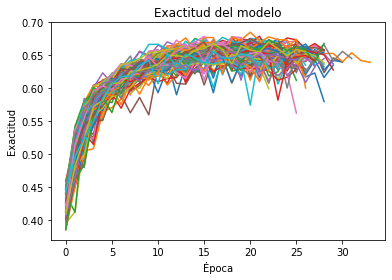

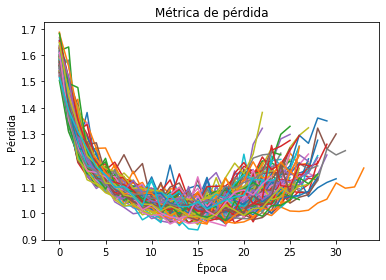

In [5]:
from matplotlib import pyplot as plt
for i in range(len(history)):
  plt.plot(history[i].history['val_acc'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.show()
# "Loss"
for i in range(len(history)):
  plt.plot(history[i].history['val_loss'])
plt.title('Métrica de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

In [6]:
from tensorflow.keras.models import load_model
best_val_history = []
for i in range(1,len(history)):
    modelo = load_model('Tipo/Arquitectura5_LR_0_01/arq5_'+str(i)+'.hdf5')
    best_val_history.append(modelo.evaluate(validation_generator))
    del modelo

  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 1.0384 - acc: 0.6434
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 0.9935 - acc: 0.6579
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 0.9820 - acc: 0.6554
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 1.0208 - acc: 0.6501
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 0.9856 - acc: 0.6609
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 1.0076 - acc: 0.6670
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 1.0241 - acc: 0.6561
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 1.0012 - acc: 0.6626
  ...
    to  
  ['...']
263/263 [==============================] - 5s 18ms/step - loss: 1.0167 - acc: 0.6428
  ...
    

In [7]:
prom_loss = 0.0;
prom_acc = 0.0;
for i in range(len(best_val_history)):
    prom_loss = prom_loss + best_val_history[i][0]
    prom_acc = prom_acc + best_val_history[i][1]

prom_loss = prom_loss / len(best_val_history)
prom_acc = prom_acc / len(best_val_history)

print(prom_loss)
print(prom_acc)

0.9957644294764385
0.6582734915945265


In [5]:
#Para liberar la memoria del GPU
from numba import cuda
cuda.select_device(0)
cuda.close()